In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [5]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.6 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.6 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.6 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.6 MB 1.2 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.6 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.6 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.6 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:07
   ---------- -----------------

In [10]:
df=pd.read_csv('stock_data.csv',parse_dates=True,index_col="Date")
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [12]:
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Plotting High Stock Prices

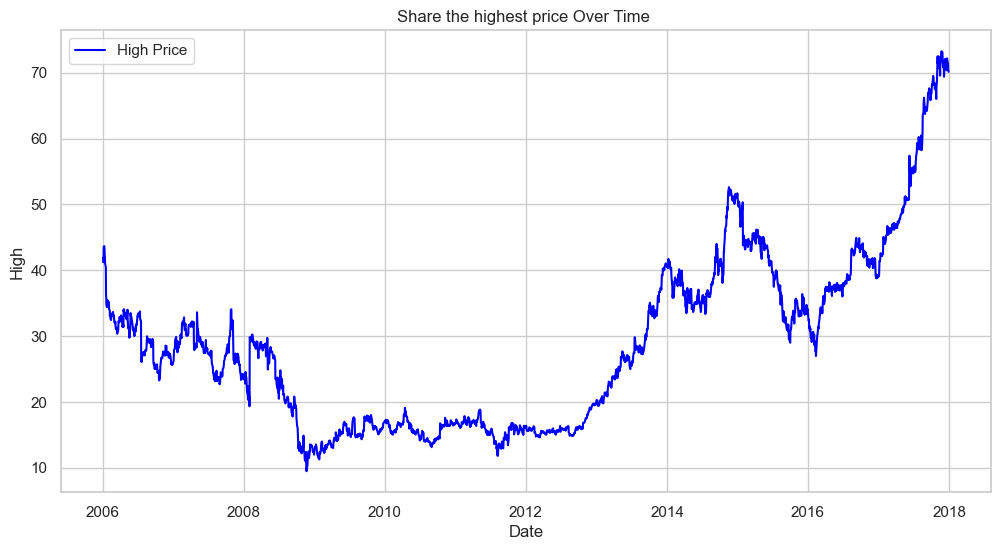

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Date',y='High',label='High Price',color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share the highest price Over Time ')
plt.show()

Resampling data 

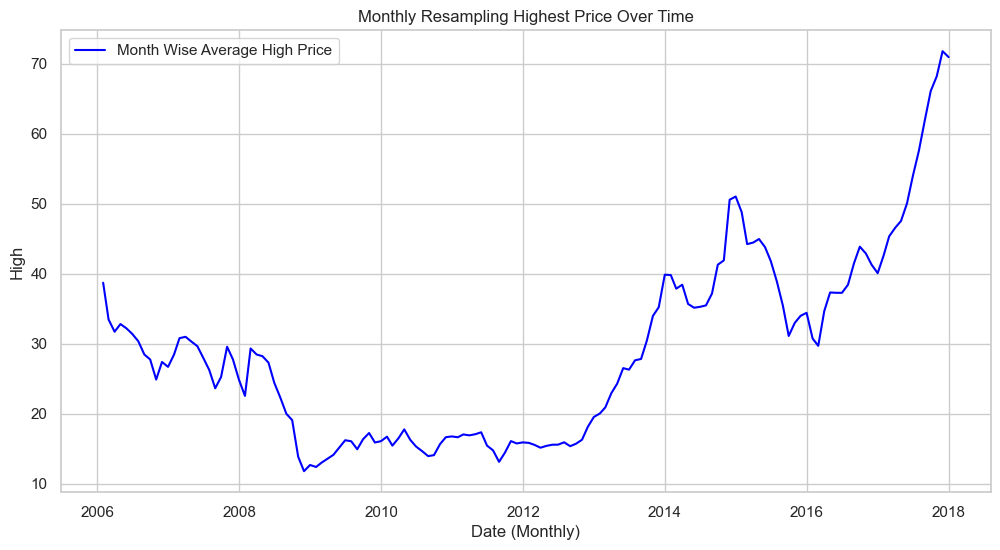

In [17]:
df_resampled = df.resample('ME').mean(numeric_only=True) 

sns.set(style="whitegrid") 

plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

Detecting seasonality with autocorrelation

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

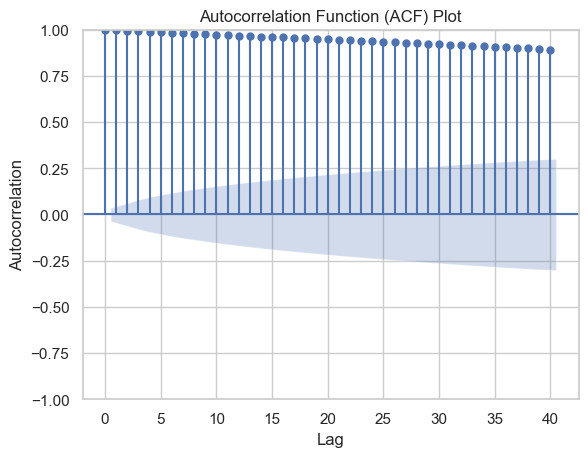

In [19]:
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535945
p-value: 0.9910868050318213
Critical Values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


Based on the ADF Statistic we accept the null hypothesis and check that the data does not appear to be stationary according to the Augmented Dickey-Fuller test.

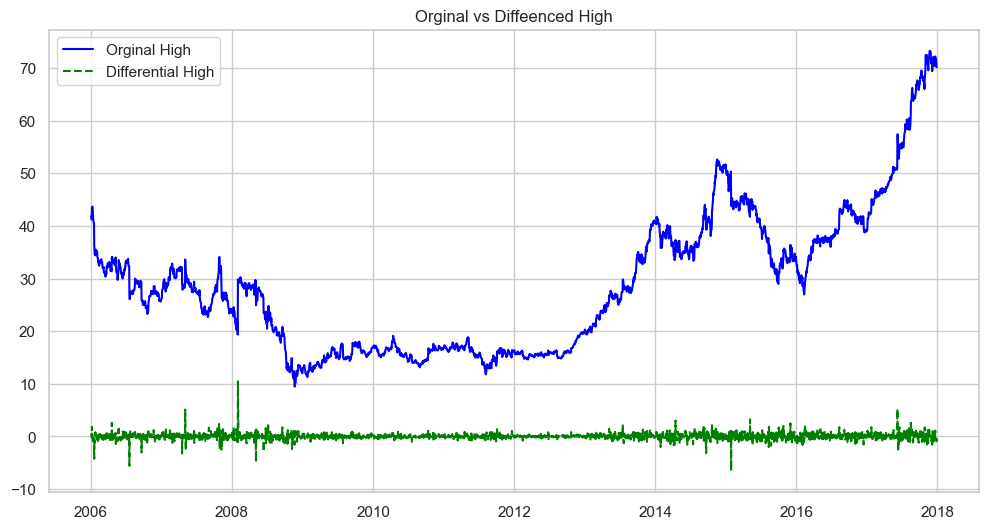

In [23]:
df['high_diff']=df['High'].diff()
plt.figure(figsize=(12,6))
plt.plot(df['High'],label='Orginal High',color='blue')
plt.plot(df['high_diff'],label='Differential High',linestyle='--',color='green')
plt.legend()
plt.title('Orginal vs Diffeenced High')
plt.show()

smoothing data with moving avaerage